# K Nearest Neighbors

 **Similar Things are near to each other**  

 $OR$

 **Similiar Things exist in close proximity**

 E.g: School of fish swim together, Army of ants work together.

### What is KNN?
KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.

**KNN exhibits two type of properties**

1. $Non \ Parametric$

  It means the parameters of the model are (potentially) infinite. So, Complexity of the model grows with the training data.

2. $Lazy \ Learning$
  
  It means model simply stores training data (or only minor processing) and waits until it is given a test feature sets Hence, It takes less time in training but more time in testing.



###Where does KNN is used mostly?

* Simple Recommender System
* Image Recognization Technology
* Decision Making Models

### What is k in k-Nearest Neighbors?

In KNN, k is the number of nearest neighbors.

## Algorithm for KNN

$STEP1:$ Choose the number k of neighbors

$STEP2:$ Take the k nearest neighbors of the new data point according to the distance formula like Euclidean, Manhattan or Hamming.

$STEP3:$ Among these k neighbors, count number of data points in each category.

$STEP4:$ Assign the new data to the category where you counted the most neighbors

**YOUR MODEL IS READY**

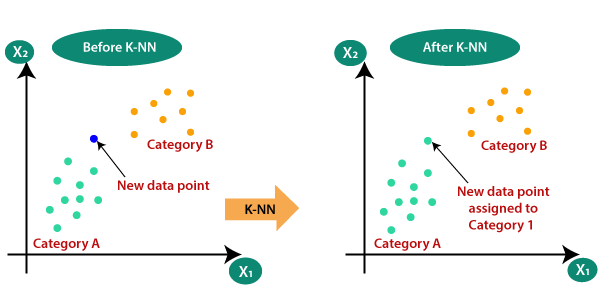

**CREDIT** [JAVATPOINT](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning)

## Readings 

1. https://sebastianraschka.com/faq/docs/parametric_vs_nonparametric.html

2. https://sebastianraschka.com/faq/docs/lazy-knn.html

3. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

4. https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

# Heart Disease Classification

In [ ]:
#Importing all the basic necessities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#Importing our dataset
dataset = pd.read_csv('heart.csv') 
'''
https://www.kaggle.com/ronitf/heart-disease-uci
'''

#Importing Helper Functions 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#Importing our today's model
from sklearn.neighbors import KNeighborsClassifier

#Importing Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see there are no null values present in our dataset.

In [ ]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

FYI Just a simple reminder,

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

## Data Exploration

Firstly, lets see how many of the people have heart disease and not.

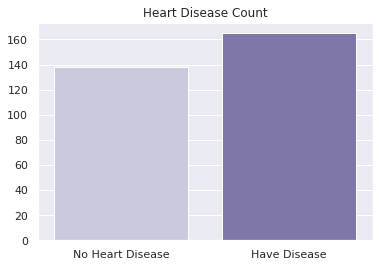

In [ ]:
sns.countplot(x="target", data=dataset, palette="Purples")
plt.xticks([0,1],['No Heart Disease',"Have Disease"])
plt.title('Heart Disease Count')
plt.xlabel('')
plt.ylabel('')
plt.show()

CONCLUSION : Our dataset consists of people having more heart disease than not having and it seems a balanced dataset.

Then, lets see in respect to sex of the people.

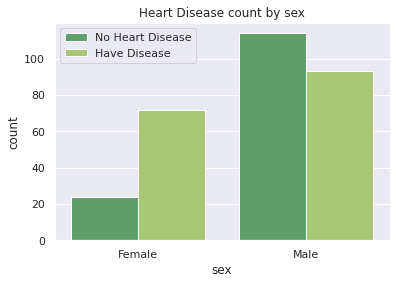

In [ ]:
sns.countplot(data=dataset, x='sex', hue='target',palette='summer')
plt.xticks([0,1],['Female',"Male"])
plt.legend(['No Heart Disease',"Have Disease"])
plt.title('Heart Disease count by sex')
plt.show()

CONCLUSION: Females suffer morely than male with heart disease.

Lets, see with respect to age.

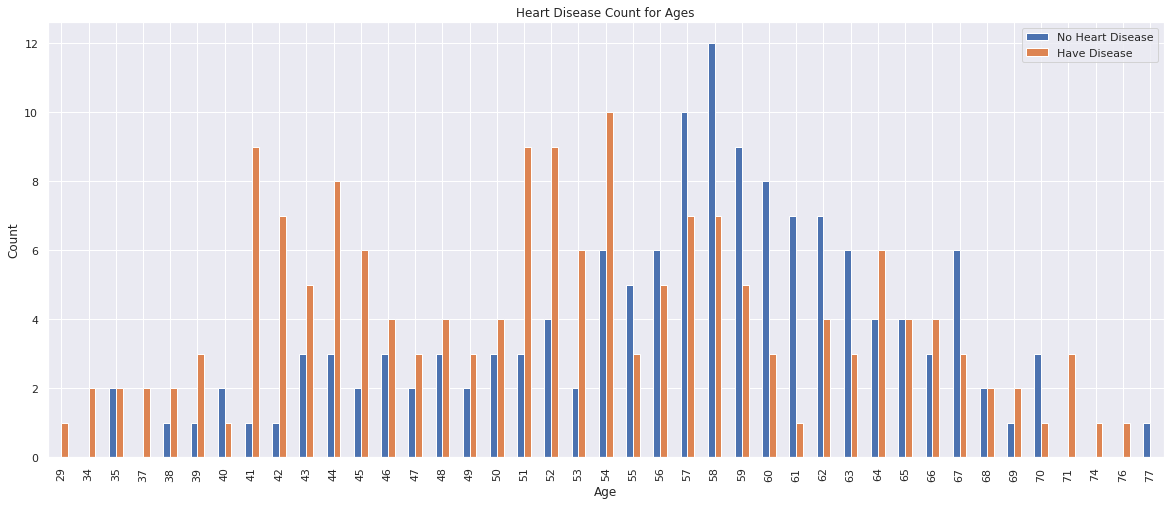

In [ ]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Count for Ages')
plt.legend(['No Heart Disease',"Have Disease"])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

CONCLUSION : AGE 41 to 54 people seems more suffering from heart disease. And, It is decreasing after that. Are people dying later?

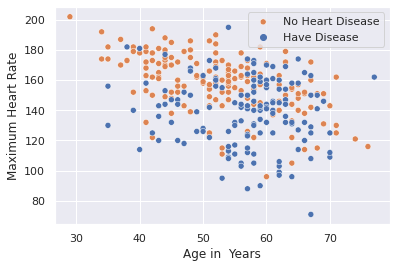

In [ ]:
sns.scatterplot(data=dataset, x='age',y='thalach',hue='target',c='red')
plt.xlabel("Age in  Years")
plt.ylabel('Maximum Heart Rate')
plt.legend(['No Heart Disease',"Have Disease"])
plt.show()

CONCLUSION: Lower age and higher max heart rate keeps you alive while it seems lower max heart rate with increasing age is succeptible to heart disease.

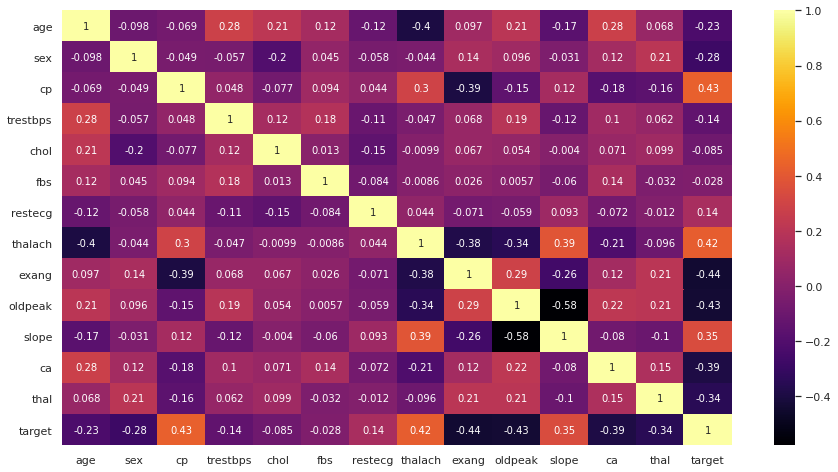

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)
plt.show()

Looking target correlation with others , we can select partial features and discard some as trestbps, chol, fbs, restecg, ,sex(irrevelant). 

In [ ]:
dataset.drop(['trestbps','chol','fbs','restecg','sex'],axis=1,inplace=True)

We  dropped those features so our model become robust and don't depend too much on irrevalent features.

In [ ]:
dataset.head()

,age,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,150,0,2.3,0,0,1,1
1,37,2,187,0,3.5,0,0,2,1
2,41,1,172,0,1.4,2,0,2,1
3,56,1,178,0,0.8,2,0,2,1
4,57,0,163,1,0.6,2,0,2,1


So, We have our feature set but even now we have some problem. We can't work with categorical variable without encoding them. 

In [ ]:
#First lets converts into array
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

We have converted our dataframe into two numpy arrays as X is feature set and y is Target Vector.

In [ ]:
X.shape

(303, 8)

We're checking shape or more importantly number of columns before our column transformer.

In [ ]:
#Using Column Transformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[1,3,5,6,7])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=np.float)


Using columnTransformer, We have passed onehotencoder on multiple columns and encoded them. The output is appended with non-processed columns using 'passthrough'.

In [ ]:
X.shape

(303, 21)

The transformed columns are in the beginning while remaining are appended later in the array.

### Model Selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)

Now, we need to scale all of our features into same scale.

In [ ]:
sc_X  = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Now lets use of KNN algorithm.

In [ ]:
#Fitting the Model
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)  #p=1 (Manhattan) , p=2 (Euclidean)
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting with the model
y_pred = classifier.predict(X_test)

In [ ]:
#Finding the metrics
cn=confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)


print('Confusion Matrix is ',cn)
print('Accuracy is ',acc)


Confusion Matrix is  [[18  9]
 [ 4 30]]
Accuracy is  0.7868852459016393


**Putting all CODE at one place so I can parameters Variable Easily**

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

ct = ColumnTransformer([('encoder',OneHotEncoder(),[1,2,5,6,8,10,11,12])],remainder='drop')
X = np.array(ct.fit_transform(X),dtype=np.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=10)


classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print('Confusion Matrix is ',confusion_matrix(y_test,y_pred))
print('Accuracy is ', accuracy_score(y_test,y_pred))

Confusion Matrix is  [[17 18]
 [ 7 19]]
Accuracy is  0.5901639344262295
